# **Aim is to classify MNIST dataset which consists of handwritten digits images using neural netwroks using tensor flow**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random   
import tensorflow as tf
from IPython.display import Image

                                                                                        #imported necessary libraries

### loading  the data #storing the data in **dataframe**

In [0]:
data_train=pd.DataFrame(pd.read_csv("sample_data/mnist_train_small.csv")) 


In [0]:
target = data_train["6"] #selecting target variable(Y_A)


In [0]:
features = data_train.drop(["6"],axis=1).copy()  #selecting features

### so basically we are unflattening the images which are **flattend**


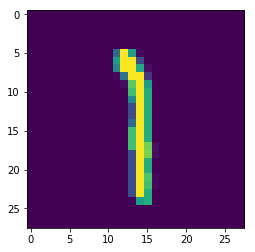

In [31]:

def visualise(x):
  x = np.array(x)
  x = x.reshape(int(np.sqrt(len(x))),int(np.sqrt(len(x))))
  plt.imshow(x)
visualise(features.iloc[45])

# using Tensorflow
Tensorflow is a module developed by Google for running Neural Networks.
It works on a method called "LAZY EVALUATION".

Which means that, we need to prepare whole architecture before feeding the data.
That said, we need to prepare the weights, bias, neurons, dot products,computing cost, optimising the weights and bias(Gradient descent) and all necessary things we need to set up before itself.
Later we need to feed the data to it and it does the work as planned by the architecture.

So lets do that!
### As we go inside, we'll discuss all things in brief about how they're working.

# **when ever we make neural network in tensorflow we make two things**
## **1) place holders 2)variables**
Tensorflow runs according to two things :
Placeholders and
Variables



# 1) Placeholders:
A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.

In [32]:

Num_features = 784
X_PH = tf.placeholder(tf.float64,[None,Num_features])#giving the data type and data shape
Y_PH = tf.placeholder(tf.float64,[None,10])             
print("X_PH shape:",X_PH.shape)
print("Y_PH shape:",Y_PH.shape)

X_PH shape: (?, 784)
Y_PH shape: (?, 10)


# 2)Variables
Variables are manipulated via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running operations on it.Internally, a tf.Variable stores a persistent tensor. Specific operations allow you to read and modify the values of this tensor. These modifications are visible across multiple tf.Sessions, so multiple workers can see the same values for a tf.Variable.
(Tensor : A high dimensional array)

In [0]:
M1 = np.random.randn(Num_features,Num_features)
M1 = tf.Variable(M1)
c1 = random.random()
c1 = tf.cast(c1, tf.float64) # Since C values are float32 , and tensors accept only float 64, we're converting all c values to float64
c1 = tf.Variable(c1)

In [0]:
M2 = np.random.randn(Num_features,Num_features)
M2 = tf.Variable(M2)
c2 = random.random()
c2 = tf.cast(c2, tf.float64) 
c2 = tf.Variable(c2)

In [0]:

M3 = np.random.randn(Num_features,Num_features)
M3 = tf.Variable(M3)
c3 = random.random()
c3 = tf.cast(c3, tf.float64) 
c3 = tf.Variable(c3)

In [0]:

M4 = np.random.rand(Num_features,10)
M4  = tf.Variable(M4)
c4 = random.random()
c4 = tf.cast(c4, tf.float64) 
c4 = tf.Variable(c4)

# Now our goal is to make Layers!
Our Hypothesis Function is **Y = mx + c**.
Where, 

*   m = slope (weight)
*   c = intercept (Bias)

---


Now our Y will fetch us predicted value of that particular x with some given m & c right.
That was our Traditional ****Machine Learning****.


---

#### Now in **Deep Learning** which involves the study of **Neural Networks**, we make Function of Functions such as **Y = mx +c** was our Hypothesis function right, we make another Hypothesis function on top of this and on top of whole of that and so on.... which forms **Layers**.
And that is what is going to fetch us Accurate Predictions with **optimal m & c**.



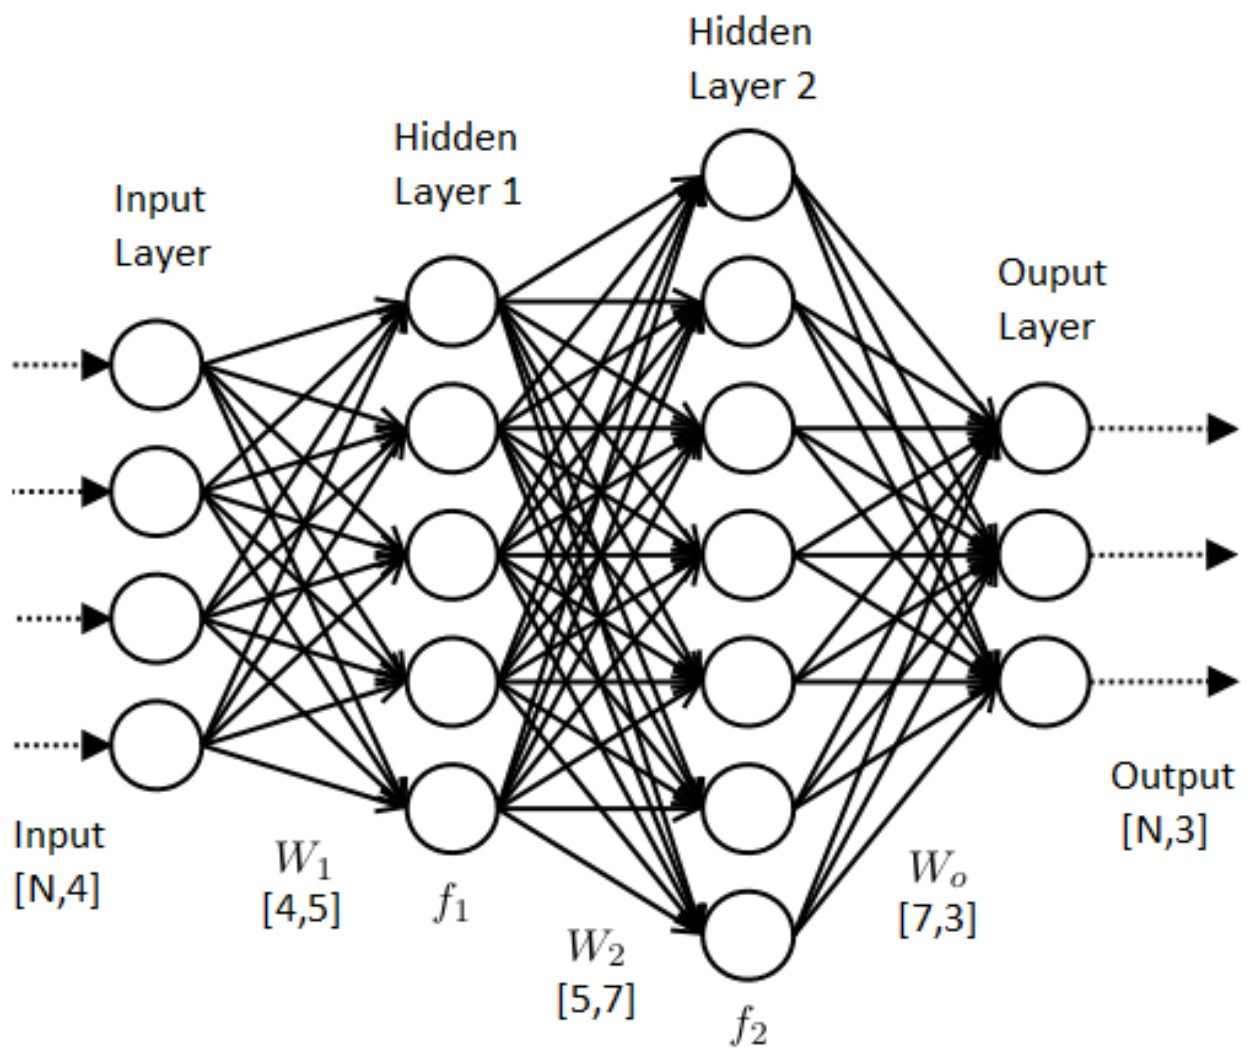

In [37]:
Image(filename = "/content/neural_network_2.png",width = 700)


In MNIST dataset there are,


*   20,000(20k) images and,
*   784 features for each image


---

Our Hypothesis Function to classify each image is going to be **Y=m.X + c**.

---

Steps to Classify each image : 

1.   Make 784 **Neurons** which are nothing but denotes each **feature** of the inputted image whose shape is (**N,784**) for $ N^{th} $ image. (**X**)

2.   Make a slopes array(**m1**) whose shape is **(784,784)** and dot product it with **X** and add an intercept value (**c**). The output array is going to be (**N,784**).
### Y = X . m+c
### (N,784) = (N, 784) . (784,784) + c

3.  Now store the above outputted matrix into a variable **J**. And dot product it with another slope matrix of shape (**784,784**) and store the ouputted matrix into another new variable **K**. 
4. Like this make as many matrices as u wish.
5. For the final layer, the slopes matrix is going to turn (**784,1**) and the final layer when dot product with this slopes matrix, its going to fetch us with a single value. Hence that is our **Y predicted** value of that inputted image


In [0]:
L1out = tf.matmul(X_PH,M1) + c1
L2out = tf.matmul(L1out,M2) + c2
L3out = tf.matmul(L2out,M3) + c3
FinalOut = tf.matmul(L3out,M4) +c4

# one hot encoding
We know that when we’re training a neural network via supervised learning, we pass labeled input to our model, and the model gives us a predicted output.
One type of encoding that is widely used for encoding categorical data with numerical values is called one-hot encoding.

One-hot encodings transform our categorical labels into vectors of 0s and 1s. The length of these vectors is the number of classes or categories that our model is expected to classify.



In [0]:
def one_hot(scalar):
  temp_arr =[0]*10                            #creating a temporary array for 10 blank positions in which 0 is 10 times
  temp_arr[scalar] =1
  return temp_arr


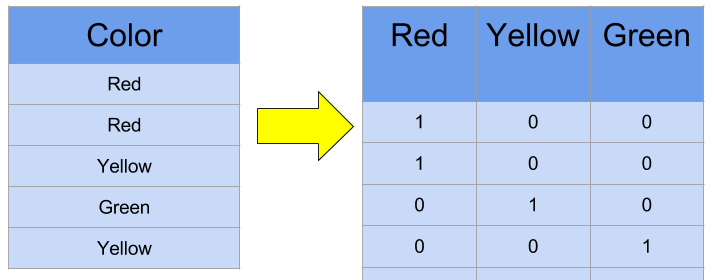

In [40]:
Image(filename = "/content/onehot.png",width = 700)

In [41]:
one_hot(6)

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [0]:
Y_oneHot = []

for i in range(len(target)):
  Y_oneHot.append(one_hot(target.iloc[i]))
  
 


In [0]:
cost = tf.reduce_mean((FinalOut - Y_oneHot)**2)

## using gradient descent ***optimizer***

In [44]:
print(FinalOut)

Tensor("add_3:0", shape=(?, 10), dtype=float64)


In [0]:
Optimizer =  tf.train.GradientDescentOptimizer(learning_rate = 0.0000000000000000000001)

In [46]:
Minimize_the_error= Optimizer.minimize(cost)             #minimizing the cost

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
Init = tf.global_variables_initializer()  #starting our base engine.

In [0]:
S = tf.Session()                        #session initializes all your variables and can acces each and everything about your neural network by putting it in session.run()
                                                        
S.run(Init)

In [0]:
FD = {X_PH : np.array(features),Y_PH: np.array(Y_oneHot)}       #Feed_dict implies we are storing the data in a box we are feeding it

# Now we are making our training ***loop***

In [50]:
from IPython.display import clear_output
error = []
iterations = 100
for i in range(iterations):
  S.run(Minimize_the_error,feed_dict = FD)
  error.append(S.run(cost,feed_dict = FD))
  clear_output(True)
  print("current iterations:",i)
  print("cost:",S.run(cost,feed_dict = FD))
  

current iterations: 99
cost: 667268999220127.5


## Here our error is decreasing very slow soin order to perform better activation functions comes into the pitcure
## so by using them at at our layers it may decrease our error fast.so by using activation functions at the outer layer we will see in the part2